In [110]:
import numpy as np 
import random as random
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
np.set_printoptions(suppress=True)

Making the agent class

In [0]:
class AgentRPS:
  def __init__(self):
    self.num_actions = 3
    self.regretSum = np.zeros(self.num_actions)
    self.strategySum = np.zeros(self.num_actions)
    
  def getStrategy(self):
    normalizingSum = 0
    self.strategy = np.maximum(self.regretSum,0)
    normalizingSum = np.sum(self.strategy)
    if normalizingSum > 0:
      self.strategy /= normalizingSum
    else:
      self.strategy = [1 / self.num_actions for i in range(self.num_actions)]
    self.strategySum += self.strategy
    return self.strategy
  
  def getAction(self):
    r = random.random()
    self.action = 0
    cumulativeProbability = 0
    while self.action < self.num_actions - 1:
      cumulativeProbability += self.strategy[self.action]
      if r < cumulativeProbability:
        break
      self.action += 1
    return self.action
  
  def getAverageStrategy(self):
    normalizingSum = np.sum(self.strategySum)
    if normalizingSum > 0:
      self.avgStrategy = self.strategySum / normalizingSum
    else:
      self.avgStrategy = [1/num_actions for i in range(self.num_actions)]
    return self.avgStrategy

Utility Function and Training Function

In [0]:
def getUtility(otherAction):
  if otherAction == 0:
    actionUtility = np.array([0,1,-1])
  elif otherAction == 1:
    actionUtility = np.array([-1,0,1])
  elif otherAction == 2:
    actionUtility = np.array([1,-1,0])
  return actionUtility

In [0]:
def train(AgentRPS1,AgentRPS2,iterations):
  strategy1 = np.zeros((iterations,AgentRPS1.num_actions))
  strategy2 = np.zeros((iterations,AgentRPS2.num_actions))
  actionUtility1 = np.zeros(AgentRPS1.num_actions)
  actionUtility2 = np.zeros(AgentRPS2.num_actions)
  for i in range(iterations):
    AgentRPS1.getStrategy()
    AgentRPS1Action = AgentRPS1.getAction()
    AgentRPS2.getStrategy()
    AgentRPS2Action = AgentRPS2.getAction()
    
    actionUtility1 = getUtility(AgentRPS2Action)
    actionUtility2 = getUtility(AgentRPS1Action)
    AgentRPS1.regretSum += actionUtility2 - actionUtility2[AgentRPS1Action]
    AgentRPS2.regretSum += actionUtility1 - actionUtility1[AgentRPS2Action]
    strategy1[i,:] = AgentRPS1.getAverageStrategy()
    strategy2[i,:] = AgentRPS2.getAverageStrategy()
  return strategy1,strategy2

Making Agent a and b

In [0]:
b = AgentRPS()
a = AgentRPS()

In [0]:
strategy1,strategy2 = train(b,a,100000)

Final Strategies

In [123]:
print(a.getAverageStrategy())

[0.33377191 0.33393339 0.3322947 ]


In [124]:
print(b.getAverageStrategy())

[0.33300916 0.33396565 0.33302518]


Plots of Strategies Vs Training Iterations

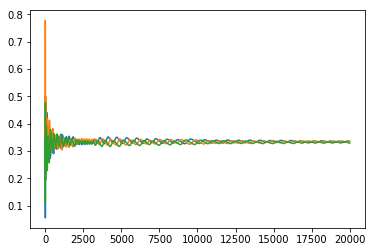

In [125]:
plot(strategy1[:20000,0])
plot(strategy1[:20000,1])
plot(strategy1[:20000,2])

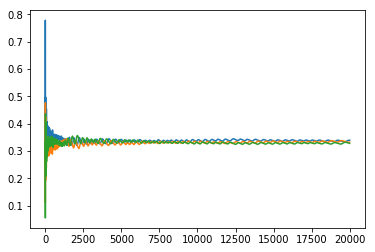

In [122]:
plot(strategy2[:20000,0])
plot(strategy2[:20000,1])
plot(strategy2[:20000,2])